<a href="https://colab.research.google.com/github/sonuuno2020/EDA-and-Data-Analysis/blob/main/Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
import datetime

In [ ]:
pip install mpl_axes_aligner # installing required library

In [ ]:
from mpl_axes_aligner import shift

In [ ]:
# get data
df=pd.read_csv('data.csv')
df.head()

,Date,GHI,PR
0,2019/07/01,3.256608,69.575676
1,2019/07/02,3.976767,79.314411
2,2019/07/03,2.811867,61.020006
3,2019/07/04,3.658408,83.262576
4,2019/07/05,5.590683,82.124440


**manipulation in data**

In [ ]:
df['30d-Avg']=[-1 if i<30 else np.average(df['PR'][i-30:i]) for i in range(len(df))]

In [ ]:
def fun(x):
  '''
    return the section based on GHI value
  '''
  if x<=2:
    return 'first'
  elif x>2 and x<=4:
    return 'second'
  elif x>4 and x<=6:
    return 'third'
  else:
    return 'fourth'

In [ ]:
colors={'first':'#000080','second':'#87CEFA','third':'#FFA500','fourth':'#A52A2A'}

In [ ]:
cn = mcd.CSS4_COLORS['lightskyblue'] # get code for colors
cn

'#87CEFA'

In [ ]:
df['Color']=[colors[fun(x)] for x in df['GHI']]

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])

In [ ]:
def budget_for_year(s):
  '''
    return Target budget PR of year for a input date
  '''
  return 73.9-((s.month-7+12*(s.year-2019))//12)*(73.9*0.008)


In [ ]:
budget_for_year(df['Date'][600])

73.3088

In [ ]:
df['budget']=[budget_for_year(s) for s in df['Date']]

In [ ]:
df['GoodPR']=df['PR']>df['budget'] # True : when PR > target budget PR for that year  , False : when PR <= Target budget PR for that year 

In [ ]:
df[200:205]

,Date,GHI,PR,30d-Avg,Color,budget,GoodPR
200,2020-01-17,4.801725,80.583118,71.732328,#FFA500,73.9,True
201,2020-01-18,3.778675,77.462479,72.072824,#87CEFA,73.9,True
202,2020-01-19,4.791725,66.242893,72.052669,#FFA500,73.9,False
203,2020-01-20,5.269483,72.962448,72.104377,#FFA500,73.9,False
204,2020-01-21,4.844850,82.201322,71.795900,#FFA500,73.9,True


In [ ]:
# calculating certain values

target_budget_pr_points=df['GoodPR'].value_counts()[0]
total_points=len(df)

target_budget_pr=round(target_budget_pr_points/total_points,2)*100

In [ ]:
# calculating certain averages

last_7d_avg=round(np.average(df.tail(10)['PR']),1)
last_30d_avg=round(np.average(df.tail(30)['PR']),1)
last_60d_avg=round(np.average(df.tail(60)['PR']),1)
last_90d_avg=round(np.average(df.tail(90)['PR']),1)
last_365d_avg=round(np.average(df.tail(365)['PR']),1)
lifetime_avg=round(np.average(df['PR']),1)

last_7d_avg,last_30d_avg,last_60d_avg,last_90d_avg,last_365d_avg,lifetime_avg

(73.0, 71.9, 73.0, 73.1, 72.8, 72.7)

In [ ]:
# locator and formator for date

month_year_formatter = mdates.DateFormatter('%b/%y')
quater_locator = mdates.MonthLocator(interval=3)

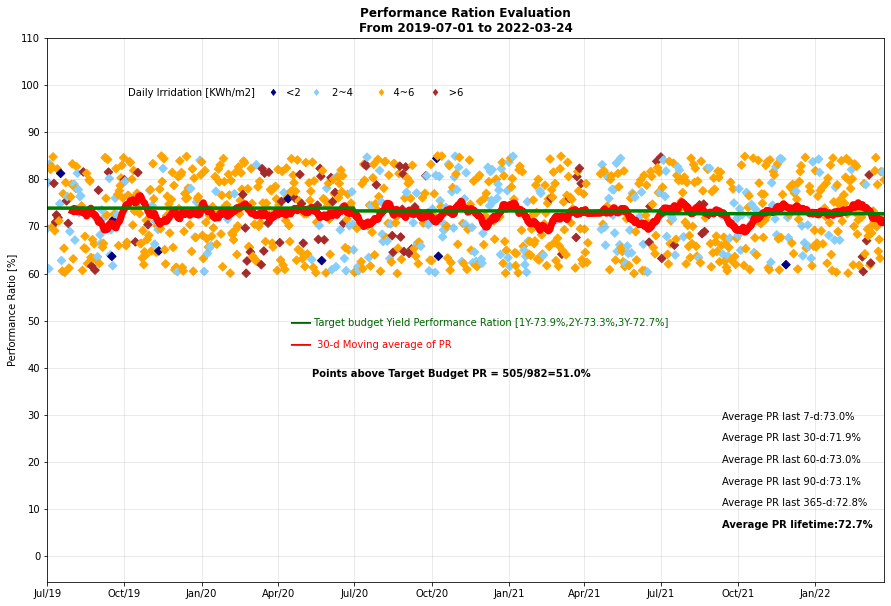

In [ ]:
# plotting graph

fig,ax=plt.subplots(figsize=(15,10))

# set locator and formator
ax.xaxis.set_major_locator(quater_locator)
ax.xaxis.set_major_formatter(month_year_formatter)

# plot data
ax.scatter(df['Date'],df['PR'],c=df['Color'],marker='D')
ax.plot(df['Date'][30:],df['30d-Avg'][30:],c='r',linewidth=7.0)
ax.plot(df['Date'],df['budget'],c='g',linewidth=3.5)

ax.yaxis.grid(color='gray', linestyle='solid',alpha=0.2)
ax.xaxis.grid(color='gray', linestyle='solid',alpha=0.2)

shift.yaxis(ax, 0, 0.2)
plt.yticks([x for x in range(0,120,10)]);


# text in graph
fig.text(0.2,0.8,'Daily Irridation [KWh/m2]          <2          2~4             4~6           >6',fontweight=12)
fig.text(0.33,0.8,'♦',c='#000080',fontweight=12)
fig.text(0.37,0.8,'♦',c='#87CEFA',fontweight=12)
fig.text(0.43,0.8,'♦',c='#FFA500',fontweight=12)
fig.text(0.48,0.8,'♦',c='#A52A2A',fontweight=12)


fig.text(0.35,0.48,'━━━╸Target budget Yield Performance Ration [1Y-73.9%,2Y-73.3%,3Y-72.7%]',c='#006400',fontweight='normal')
fig.text(0.35,0.45,'━━━╸ 30-d Moving average of PR',c='r',fontweight='normal')
fig.text(0.37,0.41,f'Points above Target Budget PR = {target_budget_pr_points}/{total_points}={target_budget_pr}%',fontweight=600)

fig.text(0.75,0.35,f'Average PR last 7-d:{last_7d_avg}%')
fig.text(0.75,0.32,f'Average PR last 30-d:{last_30d_avg}%')
fig.text(0.75,0.29,f'Average PR last 60-d:{last_60d_avg}%')
fig.text(0.75,0.26,f'Average PR last 90-d:{last_90d_avg}%')
fig.text(0.75,0.23,f'Average PR last 365-d:{last_365d_avg}%')
fig.text(0.75,0.20,f'Average PR lifetime:{lifetime_avg}%',fontweight=600)

# label & title
plt.ylabel('Performance Ratio [%]')
plt.title('Performance Ration Evaluation\nFrom 2019-07-01 to 2022-03-24',fontweight=600)
plt.margins(x=0)
